Veriyi oku ve ilk 5 satırı görüntüle.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Yapay Zeka Atölye/yapay_zeka_17072025/ogrenci_notlari.csv")
print(df.head())

   ogrenci_id    isim       ders  vize  final  devamsizlik
0           1  Zeynep  Matematik   NaN   31.0            7
1           2  Zeynep   Biyoloji  47.0   37.0            8
2           3   Fatma  Matematik  88.0    NaN            9
3           4    Ayşe      Fizik  96.0   49.0            4
4           5  Mehmet      Fizik  75.0   93.0            4


Eksik notları tespit et ve ortalama(changed with zero) ile doldur.

In [ ]:
print(df.isna().sum())

ogrenci_id     0
isim           0
ders           0
vize           3
final          7
devamsizlik    0
dtype: int64


In [ ]:
df["vize"] = df["vize"].fillna(0)
df["final"] = df["final"].fillna(0)

In [ ]:
df

,ogrenci_id,isim,ders,vize,final,devamsizlik
0,1,Zeynep,Matematik,0.0,31.0,7
1,2,Zeynep,Biyoloji,47.0,37.0,8
2,3,Fatma,Matematik,88.0,0.0,9
3,4,Ayşe,Fizik,96.0,49.0,4
4,5,Mehmet,Fizik,75.0,93.0,4
...,...,...,...,...,...,...
95,96,Mehmet,Matematik,37.0,33.0,1
96,97,Elif,Biyoloji,91.0,79.0,1
97,98,Mehmet,Biyoloji,57.0,63.0,6
98,99,Ayşe,Kimya,95.0,64.0,6


In [ ]:
print(df.isna().sum())

ogrenci_id     0
isim           0
ders           0
vize           0
final          0
devamsizlik    0
dtype: int64


Başarı notu hesapla: Vize %40, Final %60

In [ ]:
df["basarı_notu"] = df["vize"] * 0.4 + df["final"] * 0.6
print(df["basarı_notu"])

0     18.6
1     41.0
2     35.2
3     67.8
4     85.8
      ... 
95    34.6
96    83.8
97    60.6
98    76.4
99    74.2
Name: basarı_notu, Length: 100, dtype: float64


Geçti/Kaldı sınıflandırması yap. Notu 50 ve üzeri olanlar geçti.

In [ ]:
df["durum"] = df["basarı_notu"].apply(lambda x: "Geçti" if x >= 50 else "Kaldı")
print(df["durum"])

0     Kaldı
1     Kaldı
2     Kaldı
3     Geçti
4     Geçti
      ...  
95    Kaldı
96    Geçti
97    Geçti
98    Geçti
99    Geçti
Name: durum, Length: 100, dtype: object


 Her ders için ortalama başarıyı hesapla ve bar grafikle göster

<Axes: xlabel='ders'>

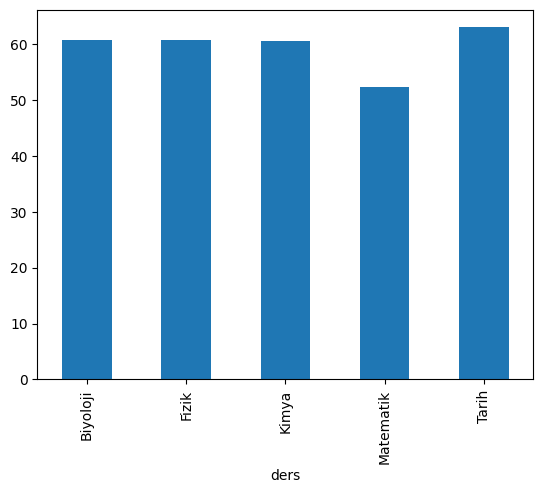

In [ ]:
df.groupby("ders")["basarı_notu"].mean().plot(kind="bar")

Devamsızlık dağılımını histogram grafiği ile çiz.


<Axes: ylabel='Frequency'>

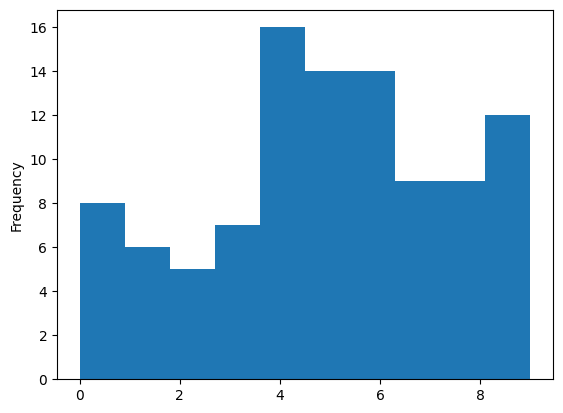

In [ ]:
df["devamsizlik"].plot(kind="hist")

 Yorum yap:

*   En düşük başarı hangi derste?
*   Devamsızlık başarıyı etkiliyor mu?
*   Sınıfta kaç kişi geçti/kaldı?

In [ ]:
gecme_durumu = df["durum"].value_counts()
print(gecme_durumu)

durum
Geçti    75
Kaldı    25
Name: count, dtype: int64
